In [1]:
import pandas as pd
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt

# Загрузка данных

In [315]:
GENDER = "female"
DATA_PATH = f"../markup/data_{GENDER}.csv"
INFO_PATH = f"../markup/data_{GENDER}_rating.csv"
POOL_PATH = "../resources"

SAMPLE_RATE = 16000
AUDIO_LENGTH = 10

In [316]:
data = pd.read_csv(DATA_PATH)
data = data[data["result"] != 0].reset_index(drop=True)

data

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,result,validation
0,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,ca8310d799b2d05cddbaccd8b5643b5b,pool_31546723_14-02-2022_13-23-16/assignment_0...,742817,902817,1,True
1,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,417163f3e47e0898097d9db1203ece89,pool_31406799_14-02-2022_13-22-34/assignment_0...,622897,782897,1,True
2,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,bea83f439f3a5f391b39a058ec1a6b0e,pool_31406799_14-02-2022_13-22-34/assignment_0...,1639451,1799451,1,True
3,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,b0cdde51ed794209697bbb9f2b9697bf,pool_31546723_14-02-2022_13-23-16/assignment_0...,1157004,1317004,1,True
4,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,31f7071b2a859d86b6d05ab13dc9b004,pool_31546723_14-02-2022_13-23-16/assignment_0...,964620,1124620,1,True
...,...,...,...,...,...,...,...,...,...,...
3013,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,70c29278a28eb94db9b0772049b1401d,pool_31546723_14-02-2022_13-23-16/assignment_0...,1372930,1532930,1,True
3014,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,c96fd56314cfe45eec858ff44d5e0484,pool_31546723_14-02-2022_13-23-16/assignment_0...,1236911,1396911,1,True
3015,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,670a79e61fe6ada74ff0e5d72a6c8c13,pool_31406799_14-02-2022_13-22-34/assignment_0...,671435,831435,1,True
3016,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,6e5962fe47204a13bfd10238b059d6a5,pool_31406799_14-02-2022_13-22-34/assignment_0...,502187,662187,1,True


In [317]:
data_rows = []
for idx, row in data.iterrows():
    cur = row
    if cur["result"] < 0:
        cur["author_first"], cur["author_second"] = cur["author_second"], cur["author_first"]
        cur["voice_first"], cur["voice_second"] = cur["voice_second"], cur["voice_first"]
        cur["L_first"], cur["L_second"] = cur["L_second"], cur["L_first"]
        cur["R_first"], cur["R_second"] = cur["R_second"], cur["R_first"]
    data_rows.append(cur)
data_formated = pd.DataFrame(data_rows, columns=list(data.columns))
data_formated.drop(columns=["result"], inplace=True)

data_formated

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,validation
0,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,ca8310d799b2d05cddbaccd8b5643b5b,pool_31546723_14-02-2022_13-23-16/assignment_0...,742817,902817,True
1,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,417163f3e47e0898097d9db1203ece89,pool_31406799_14-02-2022_13-22-34/assignment_0...,622897,782897,True
2,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,bea83f439f3a5f391b39a058ec1a6b0e,pool_31406799_14-02-2022_13-22-34/assignment_0...,1639451,1799451,True
3,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,b0cdde51ed794209697bbb9f2b9697bf,pool_31546723_14-02-2022_13-23-16/assignment_0...,1157004,1317004,True
4,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,31f7071b2a859d86b6d05ab13dc9b004,pool_31546723_14-02-2022_13-23-16/assignment_0...,964620,1124620,True
...,...,...,...,...,...,...,...,...,...
3013,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,70c29278a28eb94db9b0772049b1401d,pool_31546723_14-02-2022_13-23-16/assignment_0...,1372930,1532930,True
3014,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,c96fd56314cfe45eec858ff44d5e0484,pool_31546723_14-02-2022_13-23-16/assignment_0...,1236911,1396911,True
3015,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,670a79e61fe6ada74ff0e5d72a6c8c13,pool_31406799_14-02-2022_13-22-34/assignment_0...,671435,831435,True
3016,0c1e2288d35de08f20d4cf43edee6226,pool_31406799_14-02-2022_13-22-34/assignment_0...,330349,490349,6e5962fe47204a13bfd10238b059d6a5,pool_31406799_14-02-2022_13-22-34/assignment_0...,502187,662187,True


In [318]:
from tqdm.notebook import tqdm 
import warnings

audiofiles = dict()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for idx, row in tqdm(list(data_formated.iterrows())):
        for number in ["first", "second"]:
            voice = row[f"voice_{number}"]
            if voice not in audiofiles:
                audiofiles[voice] = librosa.load(os.path.join(POOL_PATH, voice), sr=SAMPLE_RATE)[0]

  0%|          | 0/3018 [00:00<?, ?it/s]

In [325]:
def get_audio(audio_key):
    try: 
        return audiofiles[audio_key[0]]
    except KeyError:
        print("FileNotFoundError", audio_key[0])
        raise

def get_audio_LR(audio_key):
    try: 
        return get_audio(audio_key)[audio_key[1]: audio_key[2]]
    except KeyError:
        pass

In [320]:
data_train = pd.DataFrame(data_formated.loc[~data["validation"]], columns=data_formated.columns)
data_train = data_train.reset_index(drop=True)

data_test = pd.DataFrame(data_formated.loc[data["validation"]], columns=data_formated.columns).reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

print("Validation size %.3f, train size %.3f" % (len(data_test) / len(data), len(data_train) / len(data)))

Validation size 0.279, train size 0.721


In [321]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Создание данных

In [322]:
import sys
sys.path.append('..')

In [323]:
import torch
import utils.feature_generators as fgen

from torch.utils.data import DataLoader
from collections import defaultdict
from utils.feature_usage import FeatureExtractor, SoundDataset
from utils.model_evaluation import Evaluator

In [324]:
temp_feature_generator = fgen.TempFeatureGenerator()
emotions_generator = fgen.EmotionsFeatureGenerator(os.path.join(POOL_PATH, "speech_to_text_plus_emotions.json"))
denoiser = fgen.Denoiser()

Using cache found in /Users/voidmax/.cache/torch/hub/facebookresearch_denoiser_main


In [342]:
# feature_extractor = FeatureExtractor(
#     get_audio_LR, transform=denoiser.denoise, 
#     feature_family=[
#         (temp_feature_generator, [
#             "temp_letters", 
#         ]),
#         # (fgen.SimpleFeatureGenerator(), [
#         #     "audio_zcr", "audio_rmse", "audio_entropy"
#         # ]),
#         (fgen.SreFeatureGenerator(), [
#             "f0_mean", "f0_std", "f0_mean_der", "loudness_mean", "loudness_std", "loudness_mean_der"
#         ]),
#         (fgen.LibrosaFeatureGenerator(), [
#             "librosa_mfccs_mean", "librosa_rms_mean", "librosa_chroma_mean", "librosa_centroid_mean", 
#             "librosa_tonnetz_mean", "librosa_chroma_cens_mean", "librosa_spec_bw_mean", "librosa_flatness_mean", 
#              "librosa_mfccs_std", "librosa_rms_std", "librosa_chroma_std", "librosa_centroid_std", 
#             "librosa_tonnetz_std", "librosa_chroma_cens_std", "librosa_spec_bw_std", "librosa_flatness_std", 
#         ]),
#         (emotions_generator, [
#             "negative", "positive" 
#         ]),
#         (fgen.SpectralFeatureGenerator(), [
#             "spectral_mean", "spectral_sd", "spectral_median", "spectral_mode", 
#             "spectral_Q25", "spectral_Q75", "spectral_IQR",
#             "spectral_skew", "spectral_kurt"
#         ])
#     ]
# )

feature_extractor = FeatureExtractor(
    get_audio_LR, transform=denoiser.denoise, 
    feature_family=[
        (temp_feature_generator, [
            "temp_letters", 
        ]),
        (fgen.SreFeatureGenerator(), [
            "loudness_mean", "loudness_std",
        ]),
        (fgen.LibrosaFeatureGenerator(), [
            "librosa_chroma_cens_mean",
            "librosa_spec_bw_std"
        ]),
        (fgen.SpectralFeatureGenerator(), [
            "spectral_skew"
        ])
    ]
)

In [343]:
info = pd.read_csv(INFO_PATH)

info_train = info[~info["validation"]].reset_index(drop=True)
dataset_train = SoundDataset(data_train, feature_extractor, cache_path="cache/features_train.csv")
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
evaluator_train = Evaluator(dataset_train, info_train)

info_test = info[info["validation"]].reset_index(drop=True)
dataset_test = SoundDataset(data_test, feature_extractor, cache_path="cache/features_test.csv")
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=True)
evaluator_test = Evaluator(dataset_test, info_test)

for d in tqdm(dataloader_train):
    pass
dataset_train.cache_save()

for d in tqdm(dataloader_test):
    pass
dataset_test.cache_save()

  0%|          | 0/2177 [00:00<?, ?it/s]

  0%|          | 0/841 [00:00<?, ?it/s]

In [344]:
cross_data_train = []
cross_dataset_train = []
cross_dataloader_train = []
cross_evaluator_train = []

cross_data_valid = []
cross_dataset_valid = []
cross_dataloader_valid = []
cross_evaluator_valid = []

CROSS_VALIDATION_SIZE = 5
CROSS_VALIDATION_ATTEMPTS = 10

for _ in range(CROSS_VALIDATION_ATTEMPTS):
    authors = set()
    for idx, row in data_train.iterrows():
        authors.add(row["author_first"])
        authors.add(row["author_second"])
    authors = list(authors)
    while len(authors) % CROSS_VALIDATION_SIZE != 0:
        authors.append("")
    authors = np.array(authors).reshape(CROSS_VALIDATION_SIZE, -1)

    for i in range(CROSS_VALIDATION_SIZE):
        cur_data = data_train.copy()
        cur_info = info_train.copy()
        for author in authors[i]:
            cur_data = cur_data[(cur_data["author_first"] != author) & (cur_data["author_second"] != author)]
            cur_info = cur_info[cur_info["author"] != author]
        cur_data = cur_data.reset_index(drop=True)
        cur_info = cur_info.reset_index(drop=True)

        cross_data_train.append(cur_data)
        cross_dataset_train.append(SoundDataset(cur_data, feature_extractor, cache_path="cache/features_train.csv"))
        cross_dataloader_train.append(DataLoader(cross_dataset_train[-1], batch_size=1, shuffle=True))
        cross_evaluator_train.append(Evaluator(cross_dataset_train[-1], cur_info))

    for i in range(CROSS_VALIDATION_SIZE):
        cur_data = []
        cur_info = []
        for idx, row in data_train.iterrows():
            if row["author_first"] in authors[i] and row["author_second"] in authors[i]:
                cur_data.append(row)
        for idx, row in info_train.iterrows():
            if row["author"] in authors[i]:
                cur_info.append(row)
        cur_data = pd.DataFrame(cur_data, columns=data_train.columns).reset_index(drop=True)
        cur_info = pd.DataFrame(cur_info, columns=info_train.columns).reset_index(drop=True)

        cross_data_valid.append(cur_data)
        cross_dataset_valid.append(SoundDataset(cur_data, feature_extractor, cache_path="cache/features_train.csv"))
        cross_dataloader_valid.append(DataLoader(cross_dataset_valid[-1], batch_size=1, shuffle=True))
        cross_evaluator_valid.append(Evaluator(cross_dataset_valid[-1], cur_info))

In [345]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_train = []
for idx, f in enumerate(dataloader_train.dataset):
    df_train.append(f[0])
    df_train.append(f[1])
    if idx + 1 == len(dataloader_train.dataset):
        break

df_train = pd.DataFrame(df_train)
scaler = Pipeline([
    ("scaler", StandardScaler()),
    # ("PCA", PCA(n_components=7))
]).fit(df_train)

In [346]:
tmp = pd.DataFrame(scaler.transform(df_train), columns=feature_extractor.get_feature_names()).corr()

bad_rate = defaultdict(int)

for f1 in feature_extractor.get_feature_names():
    for idx, f2 in enumerate(feature_extractor.get_feature_names()):
        if f2 <= f1:
            continue
        corr = np.abs(tmp[f1][f2])
        if corr > 0.7:
            bad_rate[f1] += 1
            bad_rate[f2] += 1
            print(f1, f2, corr)

tmp

,temp_letters,loudness_mean,loudness_std,librosa_chroma_cens_mean,librosa_spec_bw_std,spectral_skew
temp_letters,1.000000,0.525317,-0.688415,-0.270172,-0.212651,-0.028067
loudness_mean,0.525317,1.000000,-0.619190,-0.098911,-0.315714,-0.077091
loudness_std,-0.688415,-0.619190,1.000000,0.219854,0.534082,0.139389
librosa_chroma_cens_mean,-0.270172,-0.098911,0.219854,1.000000,0.069604,-0.664679
librosa_spec_bw_std,-0.212651,-0.315714,0.534082,0.069604,1.000000,0.088226
spectral_skew,-0.028067,-0.077091,0.139389,-0.664679,0.088226,1.000000


In [347]:
for key, value in bad_rate.items():
    print(key, value)

# Обучение модели

In [348]:
import torch 
import torch.nn as nn

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

class SmallModel(nn.Module):
    def __init__(self, W):
        super().__init__()

        self.MLP = nn.Sequential(
            nn.Linear(W, 1, bias=False),
            # nn.LeakyReLU(0.1),
            # nn.Linear(8, 1, bias=False),
        )
        
    def forward(self, input):
        if len(input.shape) == 1:
            input = input.reshape(1, -1)
        return self.MLP(torch.Tensor(scaler.transform(input))).view(-1)

    def compare(self, d):
        L, R = self(d[0]), self(d[1])
        values = torch.stack([L, R], dim=-1)
        values = nn.functional.softmax(values, dim=-1)
        return values

In [349]:
def plot_history(history, xlabel, title):
    for data in ["train", "test", "valid"]:
        if data not in history:
            continue
        cross_history = np.array(history[data])
        mean, std = cross_history.mean(axis=0), cross_history.std(axis=0)
        plt.plot(range(1, len(mean)), mean[1:], label=data, linewidth=2)
        plt.fill_between(range(1, len(mean)), (mean - std)[1:], (mean + std)[1:], alpha=.25)
    plt.title(title)
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()

In [ ]:
from IPython.display import clear_output
from sklearn.metrics import roc_auc_score

USING_CROSS_VALIDATION_SIZE = CROSS_VALIDATION_SIZE * CROSS_VALIDATION_ATTEMPTS

reg_coef = 0.01
regularization = lambda x: reg_coef * torch.abs(x).sum()
# regularization = lambda x: reg_coef * (x**2).sum()

model = [SmallModel(W=scaler.transform(df_train).shape[1]).to(device) for i in range(USING_CROSS_VALIDATION_SIZE)]
optimizer = [torch.optim.Adam(model[i].parameters(), lr=3e-4) for i in range(USING_CROSS_VALIDATION_SIZE)]

cross_history = defaultdict(lambda: defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)]))

times = 50
xlabel = f"epoch x{times}"


def eval(evaluator, model, dataloader):
    combined = defaultdict(list)
    with torch.no_grad():
        evaluator.evaluate(lambda x: model(x).item())
        combined["kendall_coefficients"].append(evaluator.kendall_coefficients())
        model.eval()
        y_score = []
        y_true = []
        for d in dataloader:
            values = model.compare(d)
            y_score.append(values[0][0].item())
            y_true.append(1)
            y_score.append(values[0][1].item())
            y_true.append(0)

            loss = nn.functional.cross_entropy(values, torch.zeros(values.shape[0], dtype=int))
            for layer in model.parameters():
                loss += regularization(layer)
            # loss += reg_coef * ((list(model.parameters())[0])**2).sum()

            combined["loss"].append(loss.item())
            combined["average_score"].append(values[:, 0].mean().item())
            combined["accuracy"].append(((values[:, 0] > 0.5).float().mean() + 0.5 * (values[:, 0] == 0.5).float().mean()).item())
        
        combined["roc-auc"].append(roc_auc_score(y_true, y_score))
        model.train()
    return combined


def train(evaluator, model, dataset):
    combined = defaultdict(list)
    evaluator.evaluate(lambda x: model(x).item())
    combined["kendall_coefficients"].append(evaluator.kendall_coefficients())
    for t in range(times):
        y_score = []
        y_true = []
        for d in dataset.generator():
            values = model.compare(d)
            y_score.append(values[0][0].item())
            y_true.append(1)
            y_score.append(values[0][1].item())
            y_true.append(0)

            loss = nn.functional.cross_entropy(values, torch.zeros(values.shape[0], dtype=int))
            for layer in model.parameters():
                loss += regularization(layer)
            # loss += reg_coef * ((list(model.parameters())[0])**2).sum()

            combined["loss"].append(loss.item())
            combined["accuracy"].append(((values[:, 0] > 0.5).float().mean() + 0.5 * (values[:, 0] == 0.5).float().mean()).item())
            combined["average_score"].append(values[:, 0].mean().item())

            optimizer[i].zero_grad()
            loss.backward()
            combined["grad_norm"].append(torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5).item())
            optimizer[i].step()

        combined["roc-auc"].append(roc_auc_score(y_true, y_score))
    return combined


for epoch in range(10):
    for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
        # combined = eval(evaluator_test, model[i], dataloader_test)
        # for key, value in combined.items():
        #     cross_history[key]["test"][i].append(np.mean(value))

        combined = eval(cross_evaluator_valid[i], model[i], cross_dataloader_valid[i])
        for key, value in combined.items():
            cross_history[key]["valid"][i].append(np.mean(value))

        combined = train(cross_evaluator_train[i], model[i], cross_dataset_train[i])
        for key, value in combined.items():
            cross_history[key]["train"][i].append(np.mean(value))
    
    clear_output(True)
    plt.figure(figsize=[20, 10])
    plt.rc('font', size=13)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    plt.subplot(2, 3, 4)
    plot_history(cross_history["loss"], title="Loss", xlabel=xlabel)
    
    plt.subplot(2, 3, 3)
    plot_history(cross_history["kendall_coefficients"], title="Kendall's $\\tau$ coefficient", xlabel=xlabel)

    plt.subplot(2, 3, 1)
    plot_history(cross_history["accuracy"], title="Accuracy", xlabel=xlabel)

    plt.subplot(2, 3, 5)
    plot_history(cross_history["grad_norm"], title="Gradient norm", xlabel=xlabel)
    plt.yscale("log")

    plt.subplot(2, 3, 2)
    plot_history(cross_history["average_score"], title="Average score", xlabel=xlabel)

    plt.subplot(2, 3, 6)
    plot_history(cross_history["roc-auc"], title="AUC-ROC", xlabel=xlabel)

    plt.show()
    # break

# Результаты модели

Метрики на валидации:

In [ ]:
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(cross_evaluator_valid[i], model[i], cross_dataloader_valid[i])
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

Метрики на тесте:

In [ ]:
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(evaluator_test, model[i], dataloader_test)
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

Важность признаков:

In [ ]:
imp = defaultdict(list)

for t in range(USING_CROSS_VALIDATION_SIZE):
    for name, value in zip(feature_extractor.get_feature_names(), list(model[t].parameters())[0].T.detach()):
        for v in value:
            imp[name].append(v)

for name, value in imp.items():
    value = np.array(value)
    print("{:<30}".format(name), "mean = %.5f" % np.abs(value).mean(), "\tstd = %.5f" % np.abs(value).std())

temp_letters                   mean = 0.40859 	std = 0.16624
loudness_mean                  mean = 0.77817 	std = 0.15676
loudness_std                   mean = 0.38181 	std = 0.13644
librosa_chroma_cens_mean       mean = 0.36341 	std = 0.16499
librosa_tonnetz_std            mean = 0.56824 	std = 0.16038


Распределение голосов на шкале:

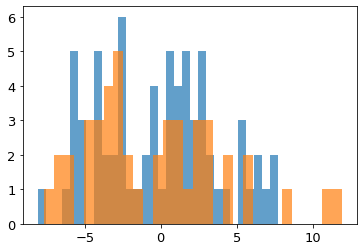

In [ ]:
res = []
for d in dataset_train._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=30, label="train", alpha=0.7)

res = []
for d in dataset_test._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=30, label="test", alpha=0.7)
plt.show()